# 一、数据预览

In [1]:
import pandas as pd

file = 'file/rumor_info_updated.csv'

df = pd.read_csv(file)

print(df.columns)
print()
print(df.dtypes)

Index(['userCertify', 'forward', 'praise', 'pic_num'], dtype='object')

userCertify    int64
forward        int64
praise         int64
pic_num        int64
dtype: object


In [15]:
df.describe()

,userCertify,forward,praise,pic_num
count,27916.000000,27916.000000,27916.000000,27916.000000
mean,0.221880,16.222632,3.396977,0.893502
std,0.495933,600.097504,214.206664,1.370219
min,0.000000,-1.000000,-1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,1.000000
75%,0.000000,0.000000,0.000000,1.000000
max,2.000000,60667.000000,25559.000000,9.000000


In [4]:
df['userCertify'].describe()

count    27916.000000
mean         0.221880
std          0.495933
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          2.000000
Name: userCertify, dtype: float64

### 去掉forward与praise中的异常值

In [21]:
df_sample = df[(df['forward'] != -1) & (df['praise'] != -1)]

In [14]:
df_sample.describe()

,userCertify,forward,praise,pic_num
count,22290.000000,22290.000000,22290.000000,22290.000000
mean,0.220323,19.890040,2.307896,0.937775
std,0.492439,671.136354,90.194357,1.466706
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,1.000000
75%,0.000000,0.000000,0.000000,1.000000
max,2.000000,60667.000000,9232.000000,9.000000


In [22]:
df_sample['userCertify'].describe()

count    22290.000000
mean         0.220323
std          0.492439
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          2.000000
Name: userCertify, dtype: float64

In [40]:
df_missing = df[(df['forward'] == -1) | (df['praise'] == -1)][['userCertify', 'pic_num']]

In [41]:
df_missing['userCertify'].describe()

count    5626.000000
mean        0.228048
std         0.509538
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         2.000000
Name: userCertify, dtype: float64

## 总结

### df：包括userCertify字段，共27916

### df_sample：包括全部的4个字段，共22290

### df_missing：传播属性丢失的df，共5626

# 二、特征工程

In [31]:
# encoding:utf-8

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set(style='whitegrid')
# sns.set()
sz = (16,8)

## 1. 判断userCertify的分布是否一致

### df_sample

userCertify
0    18167
1     3335
2      788
Name: forward, dtype: int64


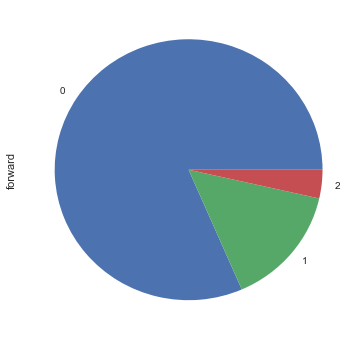

In [42]:
print(df_sample.groupby('userCertify')['forward'].count())
df_sample.groupby('userCertify')['forward'].count().plot.pie(figsize=(6, 6))

### df_missing

userCertify
0    4578
1     813
2     235
Name: pic_num, dtype: int64


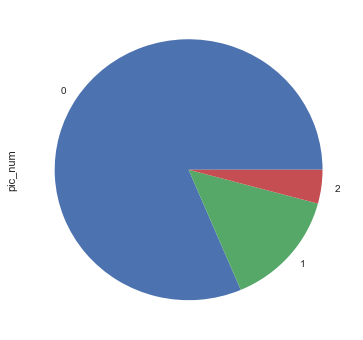

In [43]:
print(df_missing.groupby('userCertify')['pic_num'].count())
df_missing.groupby('userCertify')['pic_num'].count().plot.pie(figsize=(6, 6))

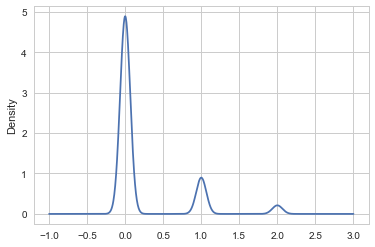

In [52]:
df_sample['userCertify'].plot(kind='kde')

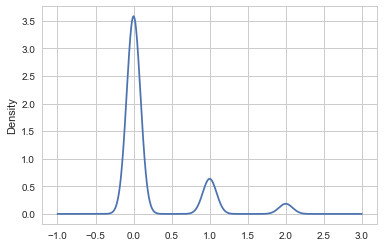

In [53]:
df_missing['userCertify'].plot(kind='kde')

## 2.1 用户认证情况

In [55]:
df['userCertify'].describe()

count    27916.000000
mean         0.221880
std          0.495933
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          2.000000
Name: userCertify, dtype: float64

([<matplotlib.axis.XTick at 0x1281e7ef0>,
 <a list of 3 Text xticklabel objects>)

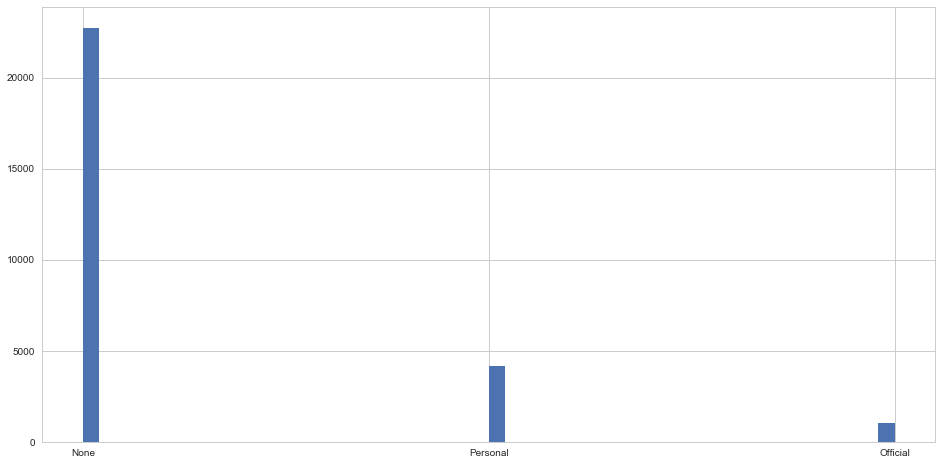

In [54]:
df['userCertify'].hist(figsize=sz, bins=50)
plt.xticks([0, 1, 2], ['None','Personal','Official'])

userCertify
0    22745
1     4148
2     1023
Name: forward, dtype: int64


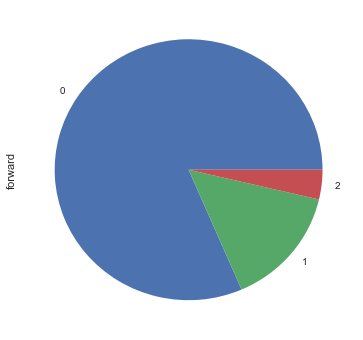

In [56]:
print(df.groupby('userCertify')['forward'].count())
df.groupby('userCertify')['forward'].count().plot.pie(figsize=(6, 6))

## 2.2 转发量

In [57]:
import numpy as np

lim_mean = df_sample['forward'].mean()
df_sample['forward'].describe()

count    22290.000000
mean        19.890040
std        671.136354
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      60667.000000
Name: forward, dtype: float64

### 直方图

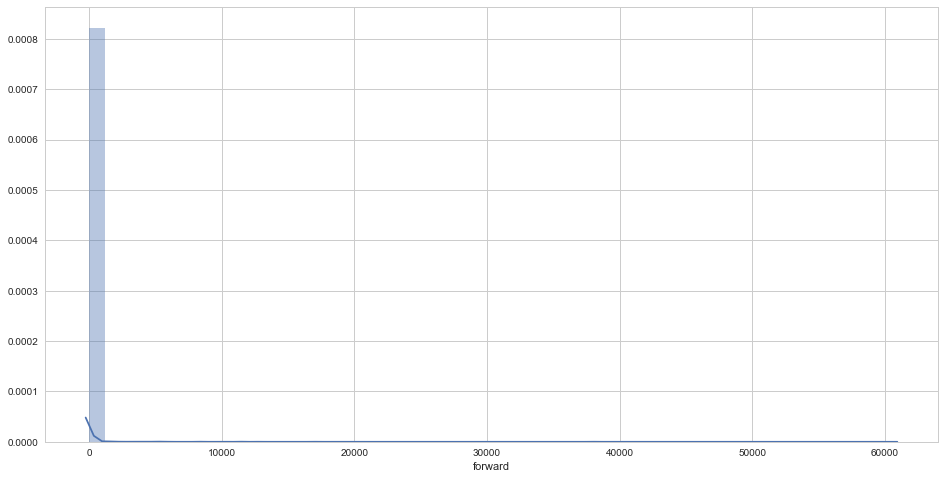

In [59]:
plt.figure(figsize=sz)
sns.distplot(df_sample['forward'])

## 2.3 点赞量

In [60]:
lim_mean = df_sample['praise'].mean()
df_sample['praise'].describe()

count    22290.000000
mean         2.307896
std         90.194357
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       9232.000000
Name: praise, dtype: float64

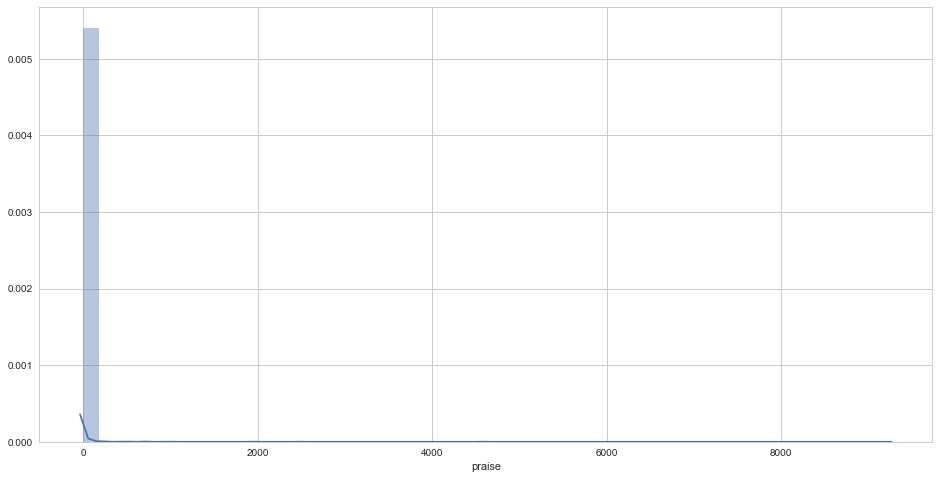

In [61]:
plt.figure(figsize=sz)
sns.distplot(df_sample['praise'])

## 2.4 图片数量

In [62]:
df_sample['pic_num'].describe()

count    22290.000000
mean         0.937775
std          1.466706
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          9.000000
Name: pic_num, dtype: float64

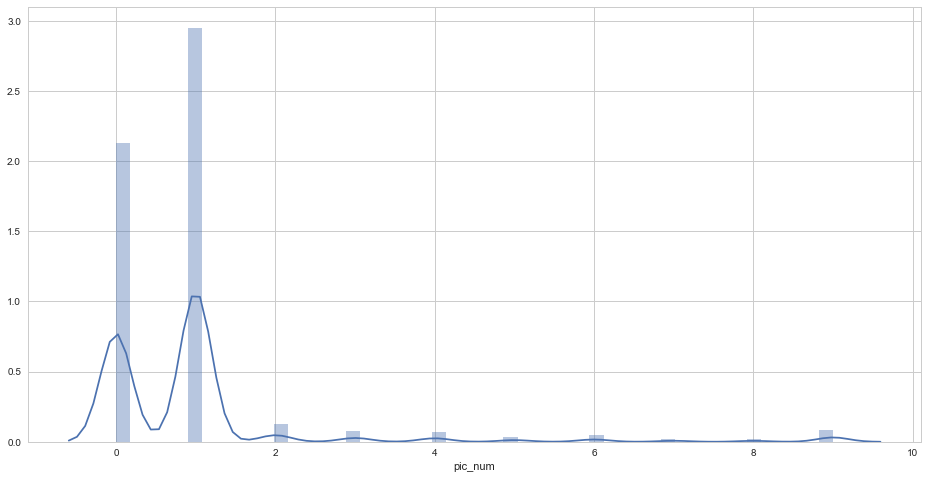

In [64]:
plt.figure(figsize=sz)
sns.distplot(df_sample['pic_num'])

## 3.1 是否认证 => 转发、点赞

### 是否认证 => 转发量的影响

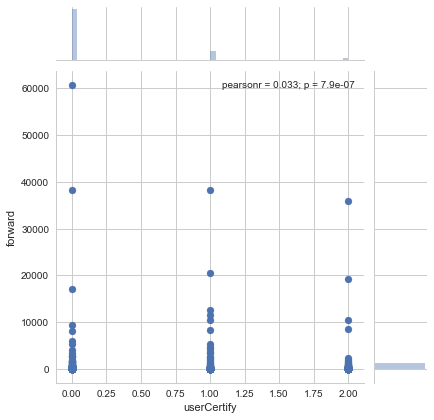

In [65]:
plt.figure(figsize=(15,15))
sns.jointplot(x='userCertify', y="forward", data=df_sample)

(0, 1000)

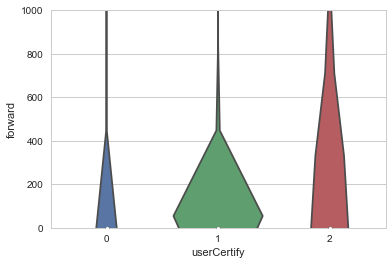

In [71]:
sns.violinplot(x='userCertify', y="forward", data=df_sample)
plt.ylim([0, 1000])

### 是否认证 => 点赞量的影响

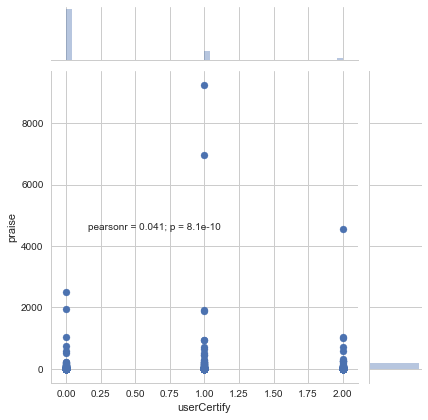

In [72]:
plt.figure(figsize=(15,15))
sns.jointplot(x='userCertify', y="praise", data=df_sample)

(0, 300)

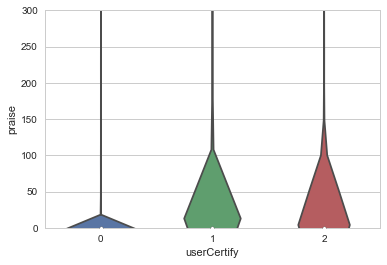

In [77]:
sns.violinplot(x='userCertify', y="praise", data=df_sample)
plt.ylim([0, 300])

## 3.2 是否认证 => 图片数量

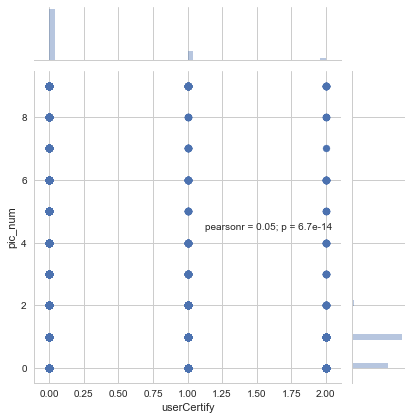

In [78]:
plt.figure(figsize=(15,15))
sns.jointplot(x='userCertify', y="pic_num", data=df_sample)

count    22290.000000
mean         0.937775
std          1.466706
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          9.000000
Name: pic_num, dtype: float64


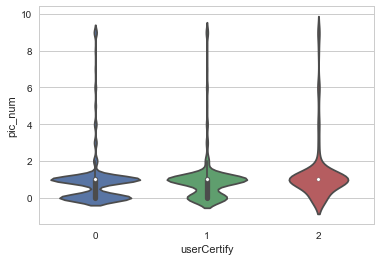

In [80]:
print(df_sample['pic_num'].describe())

sns.violinplot(x='userCertify', y="pic_num", data=df_sample)

## 3.3 图片数量 => 转发、点赞量

### 图片数量 => 转发量

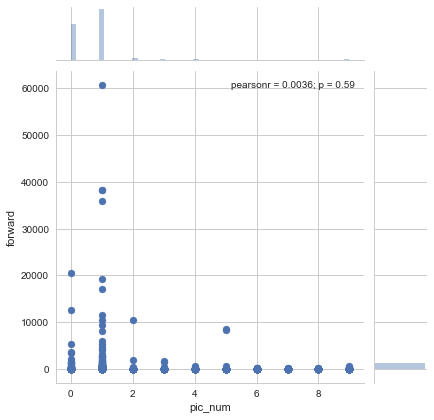

In [81]:
plt.figure(figsize=(15,15))
sns.jointplot(x='pic_num', y="forward", data=df_sample)

In [87]:
# sns.violinplot(x='pic_num', y="forward", data=df_sample)

### 图片数量 => 点赞量

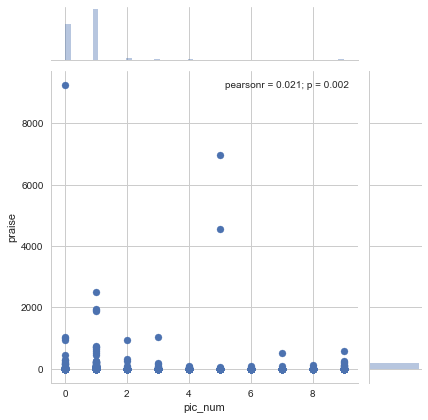

In [88]:
plt.figure(figsize=(15,15))
sns.jointplot(x='pic_num', y="praise", data=df_sample)

In [90]:
# sns.violinplot(x='pic_num', y="praise", data=df_sample)